In [2]:
import numpy as np
import pandas as pd
import plotnine as pn
from ultk.effcomm.rate_distortion import get_ib_bound

In [3]:
zkrt18_prior = np.load("/Users/nathanielimel/uci/projects/ib-color-naming/zkrt18_prior.npy")
zkrt18_meaning_dists = np.load("/Users/nathanielimel/uci/projects/ib-color-naming/zkrt18_meaning_dists.npy")

zkrt18_prior.shape, zkrt18_meaning_dists.shape

((330, 1), (330, 330))

annealing beta: 100%|██████████| 30/30 [02:51<00:00,  5.70s/it]


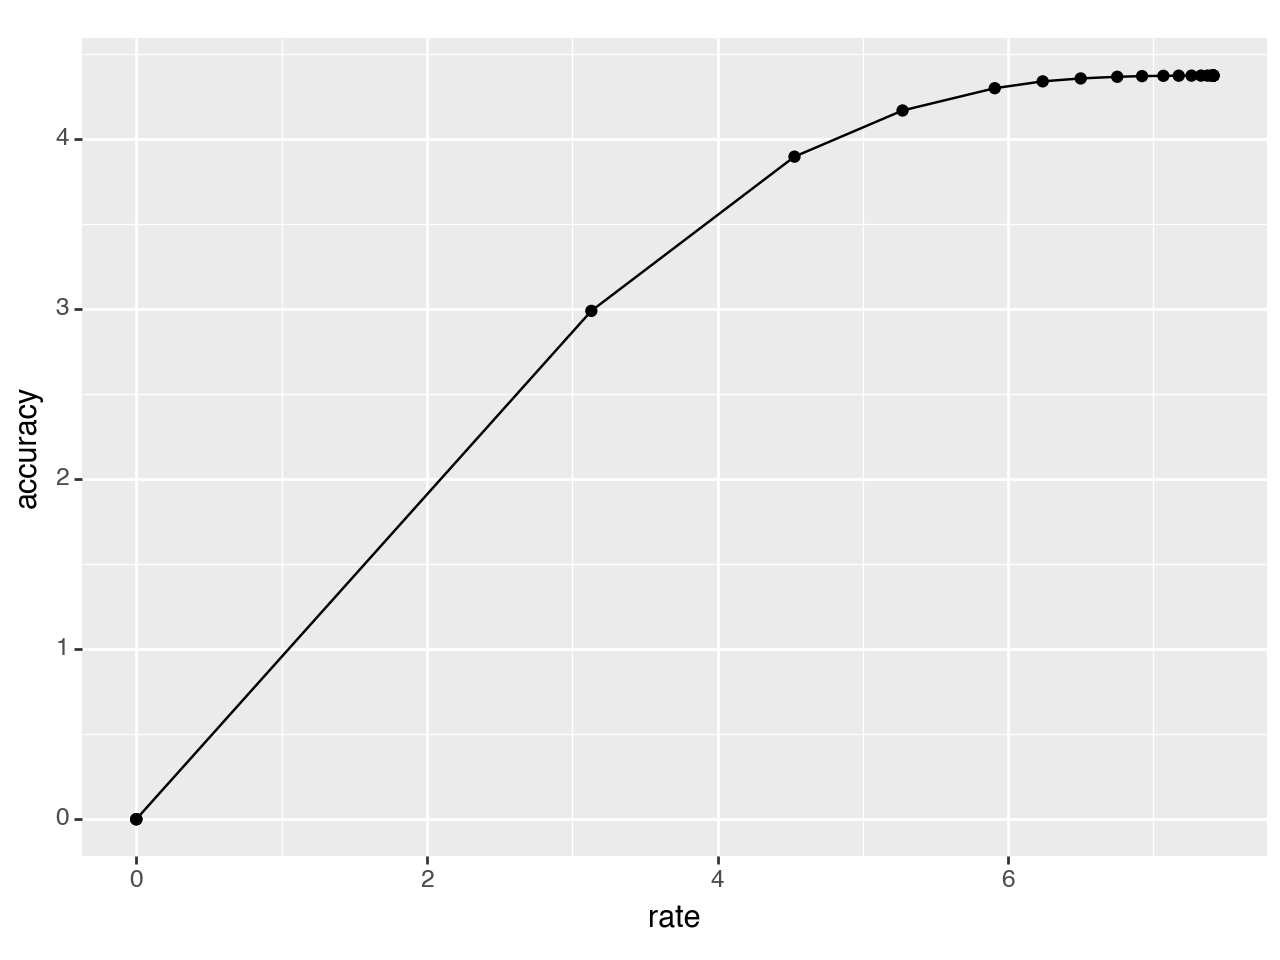

<Figure Size: (640 x 480)>

In [8]:
bound = get_ib_bound(
    prior=zkrt18_prior.squeeze(), 
    meaning_dists=zkrt18_meaning_dists,
)
plot_data = pd.DataFrame(
    [(x.rate, x.accuracy) for x in bound if x is not None], 
    columns=[
        "rate", 
        "accuracy",
    ]
)
(
    pn.ggplot(
        plot_data,
        pn.aes(x="rate", y="accuracy"),
    ) 
    + pn.geom_point() 
    + pn.geom_line()
)

Check with embo

In [4]:
import embo
from embo import InformationBottleneck
from rdot.probability import joint

pxy = joint(zkrt18_meaning_dists, zkrt18_prior)
results = InformationBottleneck(pxy=pxy).get_bottleneck()

plot_data_embo = pd.DataFrame(zip(*results[0:2]), columns=["rate", "accuracy"])
(
    pn.ggplot(
        plot_data_embo,
        pn.aes(x="rate", y="accuracy"),
    ) 
    + pn.geom_point() 
    + pn.geom_line()
)

KeyboardInterrupt: 

In [5]:
mickey_prior = np.load("prior.npy")
mickey_meaning_dists = np.load("meaning_dists.npy")

mickey_prior.shape, mickey_meaning_dists.shape

((330,), (330, 330))

annealing beta: 100%|██████████| 30/30 [00:56<00:00,  1.90s/it]


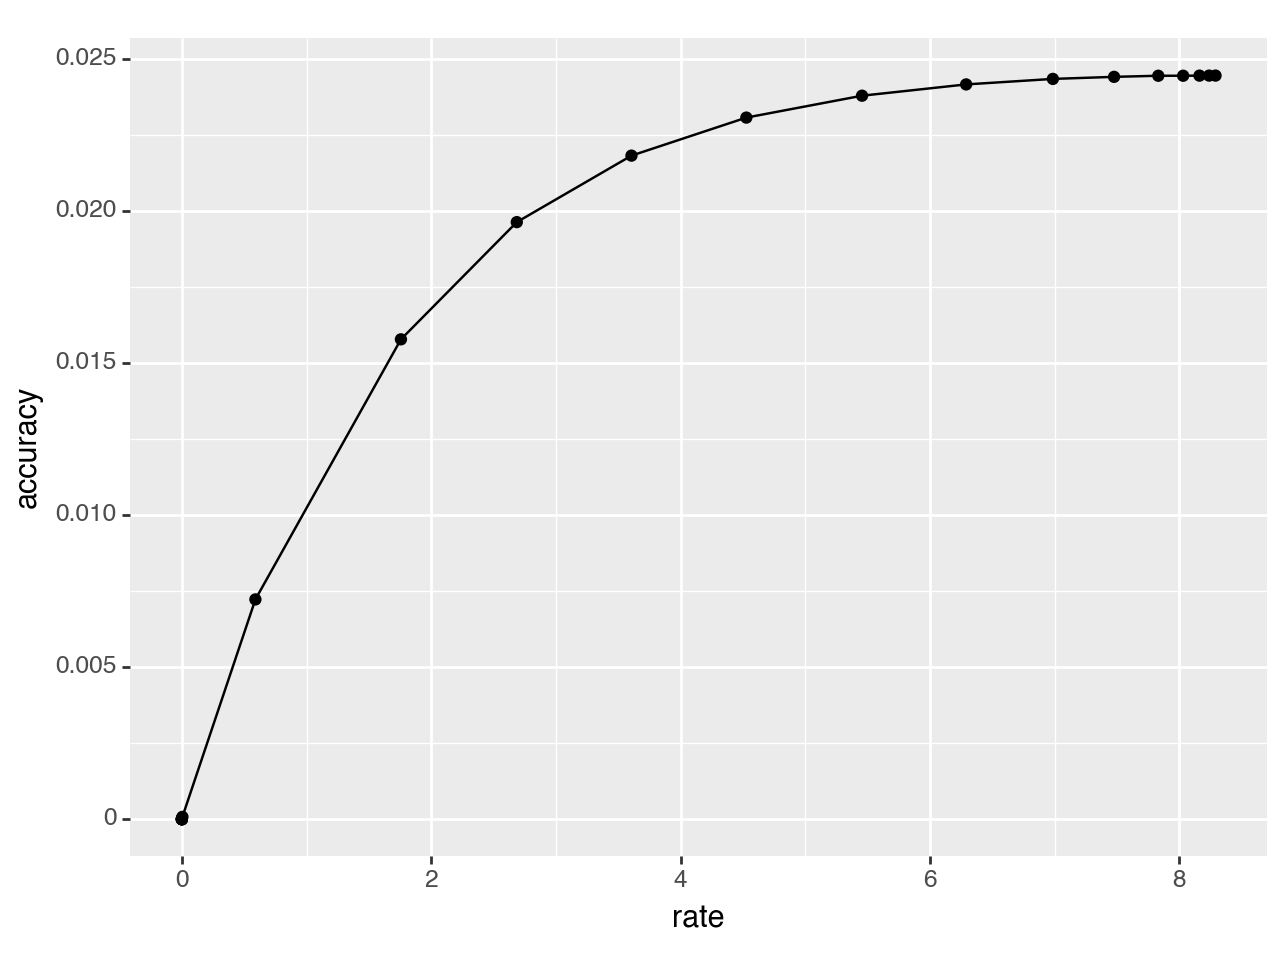

<Figure Size: (640 x 480)>

In [10]:
bound = get_ib_bound(
    prior=mickey_prior,
    meaning_dists=mickey_meaning_dists,
)
plot_data = pd.DataFrame(
    [(x.rate, x.accuracy) for x in bound if x is not None], 
    columns=[
        "rate", 
        "accuracy",
    ]
)
(
    pn.ggplot(
        plot_data,
        pn.aes(x="rate", y="accuracy"),
    ) 
    + pn.geom_point() 
    + pn.geom_line()
)

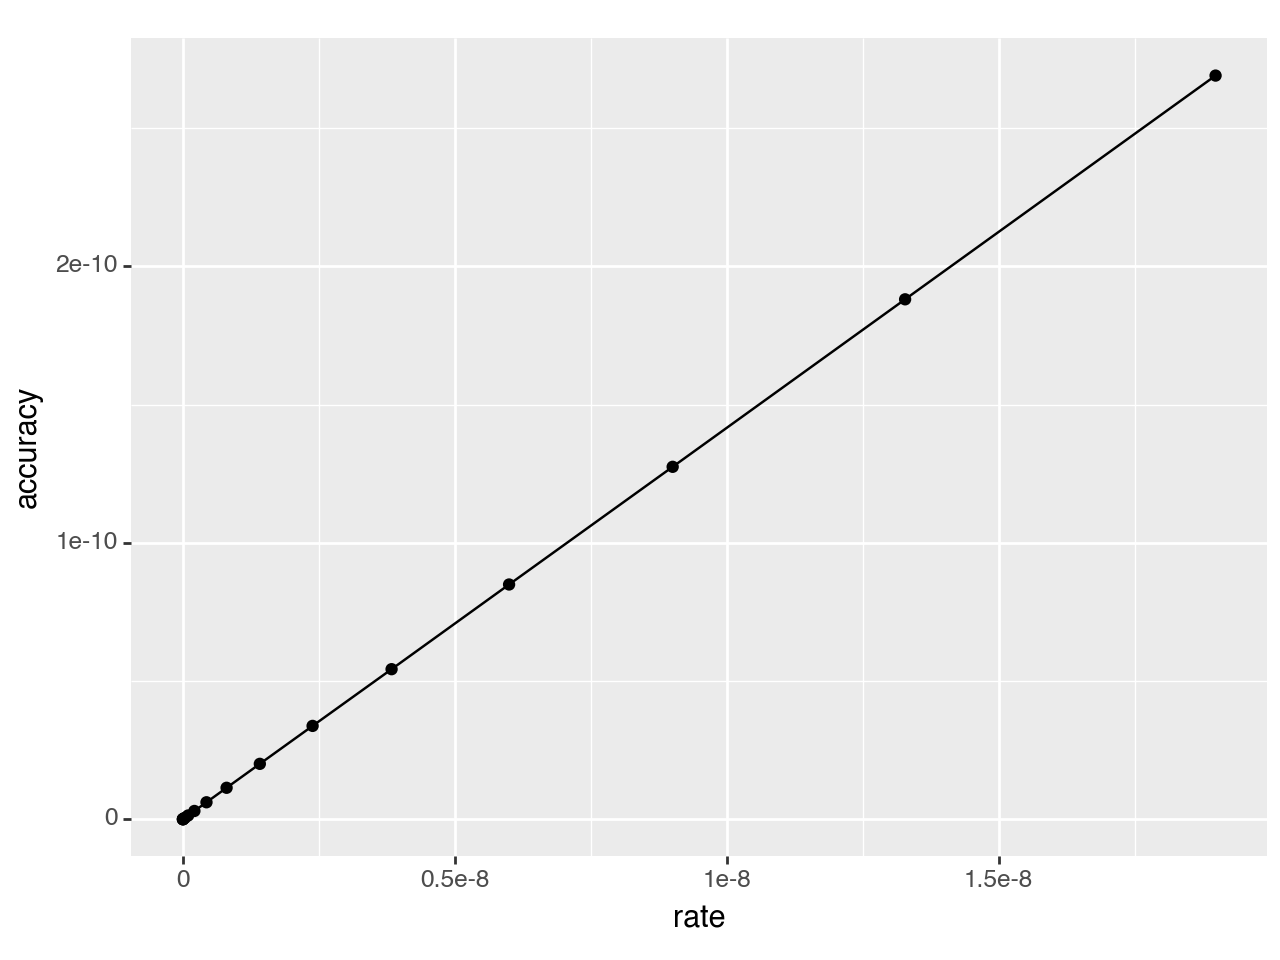

<Figure Size: (640 x 480)>

In [6]:
import embo
from embo import InformationBottleneck
from rdot.probability import joint

pxy = joint(mickey_meaning_dists, mickey_prior)
results = InformationBottleneck(pxy=pxy).get_bottleneck()

/Users/nathanielimel/miniforge3/envs/ultk/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ultk/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


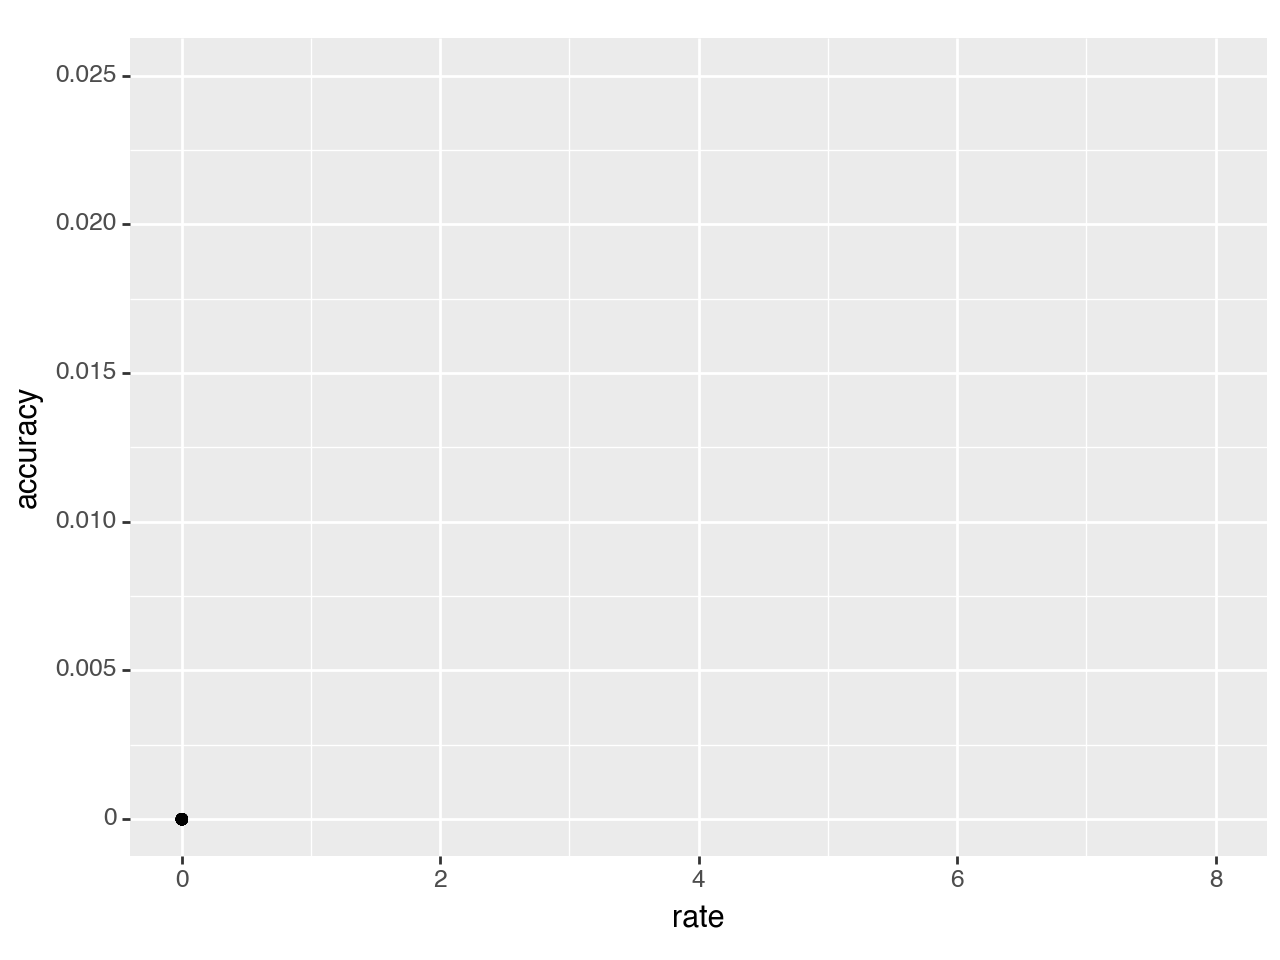

<Figure Size: (640 x 480)>

In [8]:
plot_data_embo = pd.DataFrame(zip(*results[0:2]), columns=["rate", "accuracy"])
# Lol, embo sucks
(
    pn.ggplot(
        plot_data_embo,
        pn.aes(x="rate", y="accuracy"),
    ) 
    + pn.geom_point() 
    + pn.geom_line()
    + pn.xlim([0,8])
    + pn.ylim([0,0.025])
)

In [ ]:
# Sanity check compare the prior and meaninn dists